In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data (make sure this CSV is in the same folder as the notebook)
file_path = "Grade_2_cleaned.csv"  # change this path if needed
df = pd.read_csv(file_path)

df.head()


,Unnamed: 6,1,2,1.1,1.2,2.1,3,4,1.3,1.4,2.2,Relevant Ideas,Language Use,My Feeling,Total Grade
0,0,1,1,1,1,1,1,1,1,1,0,0,0,B,9
1,0,0,1,1,0,0,0,0,1,0,0,0,0,C,3
2,0,0,1,0,0,1,1,1,0,0,0,0,0,C,4
3,0,1,1,1,1,1,1,1,1,0,0,0,0,B,8
4,0,0,1,0,0,0,0,0,1,1,0,0,0,B,3


In [6]:
# Check the available columns
df.columns



Index(['Unnamed: 6', '1', '2', '1.1', '1.2', '2.1', '3', '4', '1.3', '1.4',
       '2.2', 'Relevant Ideas', 'Language Use', 'My Feeling', 'Total Grade'],
      dtype='object')

In [7]:
# Map 'My Feeling' letter grades to numeric values
feeling_map = {'A': 5, 'B': 4, 'C': 3, 'D': 2, 'E': 1, 'F': 0}

subset_numeric = pd.DataFrame({
    'Total Grade': df['Total Grade'],
    'My Feeling (numeric)': df['My Feeling'].map(feeling_map)
})

# Compute correlation matrix
corr_matrix_numeric = subset_numeric.corr()
corr_matrix_numeric


,Total Grade,My Feeling (numeric)
Total Grade,1.000000,0.453795
My Feeling (numeric),0.453795,1.000000


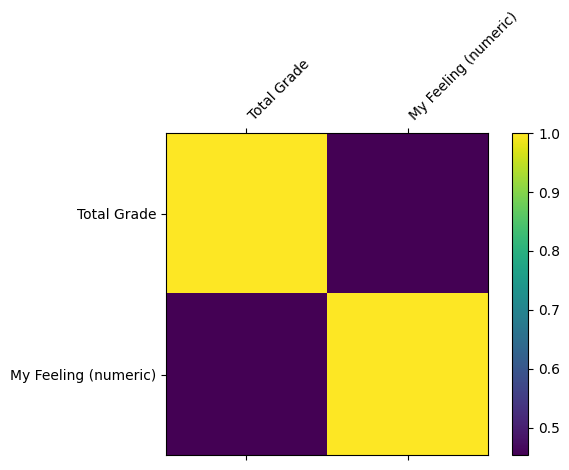

In [8]:
# Plot the correlation matrix as a heatmap
fig, ax = plt.subplots()

cax = ax.matshow(corr_matrix_numeric)
fig.colorbar(cax)

ticks = range(len(corr_matrix_numeric.columns))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(corr_matrix_numeric.columns, rotation=45, ha="left")
ax.set_yticklabels(corr_matrix_numeric.columns)

plt.tight_layout()
plt.show()


In [9]:
# Supervised learning models to predict My Feeling from Total Grade

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# 1. Encode My Feeling (A–F) as labels
y = df["My Feeling"].astype(str)        # target (categorical)
X = df[["Total Grade"]]                # feature (numeric, 2D)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)   # A–F -> 0..n_classes-1

# 2. Train / test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# 3. Define models to compare
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "k-Nearest Neighbors (k=5)": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine (RBF)": SVC(kernel="rbf", probability=True, random_state=42),
}

# 4. Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print("=" * 60)
    print(f"Model: {name}")
    print(f"Accuracy: {acc:.3f}")
    print("Classification report:")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

    print("Confusion matrix (rows=true, cols=predicted):")
    print(confusion_matrix(y_test, y_pred))

# 5. Example: use the best model (manually pick one) to predict a new feeling
best_model = models["Random Forest"]   # change this to whichever performs best
example_grade = np.array([[85]])       # put any grade here
pred_encoded = best_model.predict(example_grade)[0]
pred_label = label_encoder.inverse_transform([pred_encoded])[0]
print("=" * 60)
print(f"For Total Grade = {example_grade[0,0]}, predicted My Feeling = {pred_label}")


Model: Logistic Regression
Accuracy: 0.567
Classification report:
              precision    recall  f1-score   support

           A       0.57      0.95      0.71       934
           B       0.00      0.00      0.00       430
           C       0.00      0.00      0.00       113
           D       0.00      0.00      0.00        71
           E       0.00      0.00      0.00        90
           F       0.56      0.78      0.65       210

    accuracy                           0.57      1848
   macro avg       0.19      0.29      0.23      1848
weighted avg       0.35      0.57      0.43      1848

Confusion matrix (rows=true, cols=predicted):
[[884   0   0   0   0  50]
 [406   0   0   0   0  24]
 [104   0   0   0   0   9]
 [ 54   0   0   0   0  17]
 [ 64   0   0   0   0  26]
 [ 47   0   0   0   0 163]]


C:\Users\Etaf\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Etaf\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Etaf\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


Model: Random Forest
Accuracy: 0.575
Classification report:
              precision    recall  f1-score   support

           A       0.56      0.97      0.71       934
           B       0.00      0.00      0.00       430
           C       0.00      0.00      0.00       113
           D       0.00      0.00      0.00        71
           E       0.00      0.00      0.00        90
           F       0.67      0.77      0.72       210

    accuracy                           0.58      1848
   macro avg       0.21      0.29      0.24      1848
weighted avg       0.36      0.58      0.44      1848

Confusion matrix (rows=true, cols=predicted):
[[902   0   0   0   0  32]
 [421   0   0   0   0   9]
 [107   0   0   0   0   6]
 [ 61   0   0   0   0  10]
 [ 68   0   0   0   0  22]
 [ 49   0   0   0   0 161]]
Model: k-Nearest Neighbors (k=5)
Accuracy: 0.541
Classification report:
              precision    recall  f1-score   support

           A       0.57      0.80      0.67       934
       

C:\Users\Etaf\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Etaf\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Etaf\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Etaf\anaconda3\Lib\sit

Model: Support Vector Machine (RBF)
Accuracy: 0.575
Classification report:
              precision    recall  f1-score   support

           A       0.56      0.97      0.71       934
           B       0.00      0.00      0.00       430
           C       0.00      0.00      0.00       113
           D       0.00      0.00      0.00        71
           E       0.00      0.00      0.00        90
           F       0.67      0.77      0.72       210

    accuracy                           0.58      1848
   macro avg       0.21      0.29      0.24      1848
weighted avg       0.36      0.58      0.44      1848

Confusion matrix (rows=true, cols=predicted):
[[902   0   0   0   0  32]
 [421   0   0   0   0   9]
 [107   0   0   0   0   6]
 [ 61   0   0   0   0  10]
 [ 68   0   0   0   0  22]
 [ 49   0   0   0   0 161]]
For Total Grade = 85, predicted My Feeling = A


C:\Users\Etaf\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Etaf\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Etaf\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Etaf\anaconda3\Lib\sit

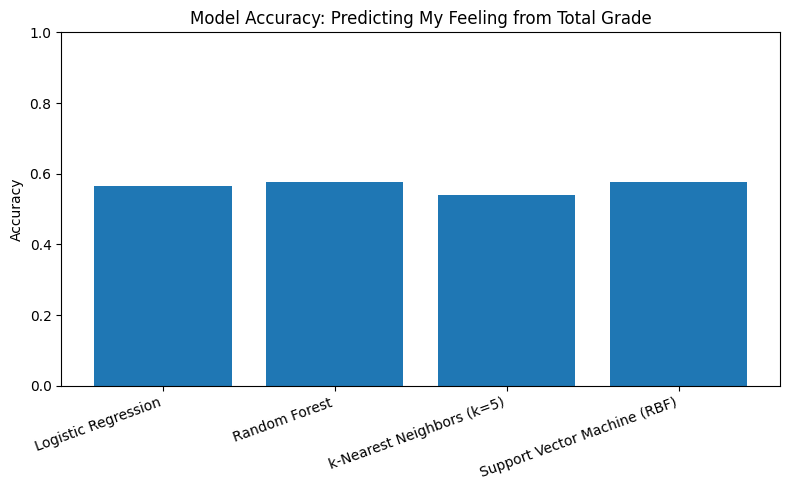

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Re-evaluate all models and store their accuracies
model_names = []
accuracies = []

for name, model in models.items():
    # (Re)fit to be safe – remove this line if you already trained them
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    model_names.append(name)
    accuracies.append(acc)

# Plot a bar chart of accuracies
plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracies)
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.title("Model Accuracy: Predicting My Feeling from Total Grade")
plt.xticks(rotation=20, ha="right")
plt.tight_layout()
plt.show()


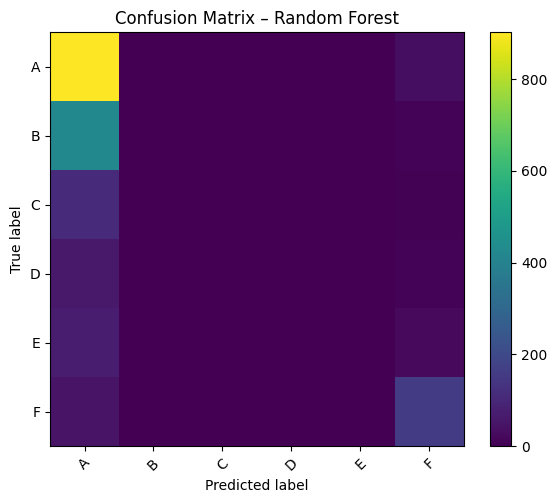

In [11]:
from sklearn.metrics import confusion_matrix
import numpy as np

chosen_name = "Random Forest"
chosen_model = models[chosen_name]

# Ensure trained
chosen_model.fit(X_train, y_train)
y_pred = chosen_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
plt.imshow(cm, interpolation="nearest")
plt.title(f"Confusion Matrix – {chosen_name}")
plt.colorbar()
tick_marks = np.arange(len(label_encoder.classes_))
plt.xticks(tick_marks, label_encoder.classes_, rotation=45)
plt.yticks(tick_marks, label_encoder.classes_)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
plt.show()
